Infopillar Solutions


Name : IMAD DARVESH 

Task 1 : Loan Prediction

Language : Python

Software : Jupyter Notebook

Dataset : http://lib.stat.cmu.edu/datasets/boston



#   Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing Data

In [2]:
boston = load_boston()
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [3]:
boston.data.shape

(506, 13)

# Converting data into dataframe

In [4]:
boston_df=pd.DataFrame(boston.data)

In [5]:
boston_df.columns=boston.feature_names

In [6]:
boston_df['PRICE']=boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [7]:
print(boston.target.shape) # Shape of the dataset 

(506,)


In [8]:
boston_df.describe()       # Describing the dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

C:\Users\Imad18\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

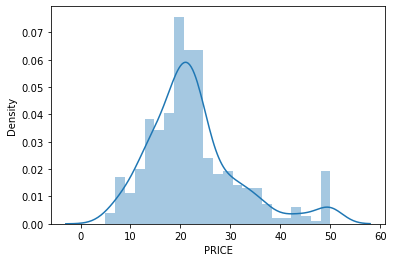

In [11]:
sns.distplot(boston_df['PRICE'])

In [12]:
boston_df.isnull().sum() # Checking for Null Values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Visualization

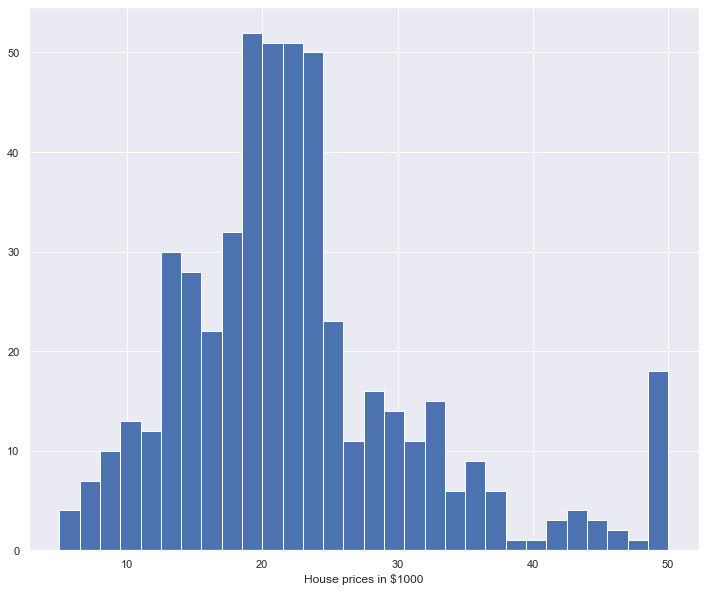

In [13]:
sns.set(rc={'figure.figsize':(12,10)})  
plt.hist(boston_df['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<AxesSubplot:>

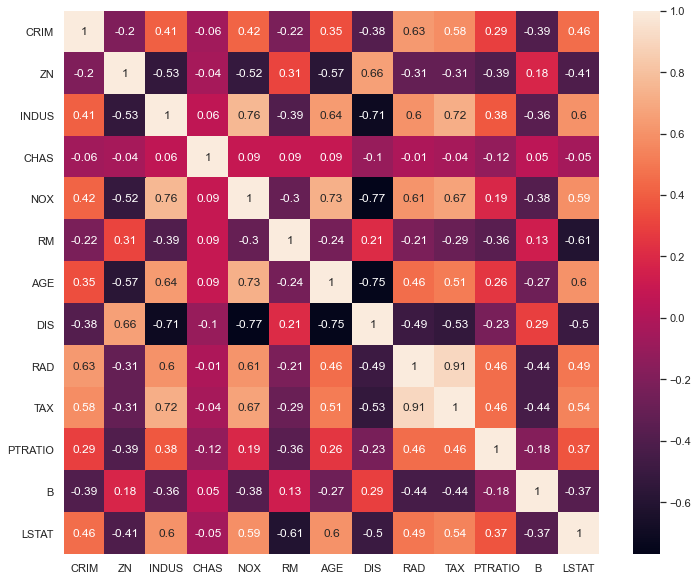

In [14]:
bos_1=pd.DataFrame(boston.data, columns=boston.feature_names)

correlation_matrix=bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Splitting the Data

In [15]:
X = boston_df.iloc[:,:-1].values
y = boston_df.iloc[:,-1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)

print('Coefficients: \n',lm.coef_)

Coefficients: 
 [-8.85049752e-02  5.02928536e-02  2.03483110e-02  3.75427054e+00
 -1.77483714e+01  3.24776492e+00  1.20008182e-02 -1.40916141e+00
  2.63880691e-01 -1.03440009e-02 -9.51780874e-01  6.11600491e-03
 -5.97133217e-01]


In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
predictions = lm.predict(X_test)
predictions

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.835696361418929
MSE:  28.547585271468172
RMSE:  5.342994036256092


# Plotting the Model

RMSE score: 5.342994036256092
R2 score: 0.7123963332666869

Scatter plot of y_test against y_pred:


C:\Users\Imad18\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


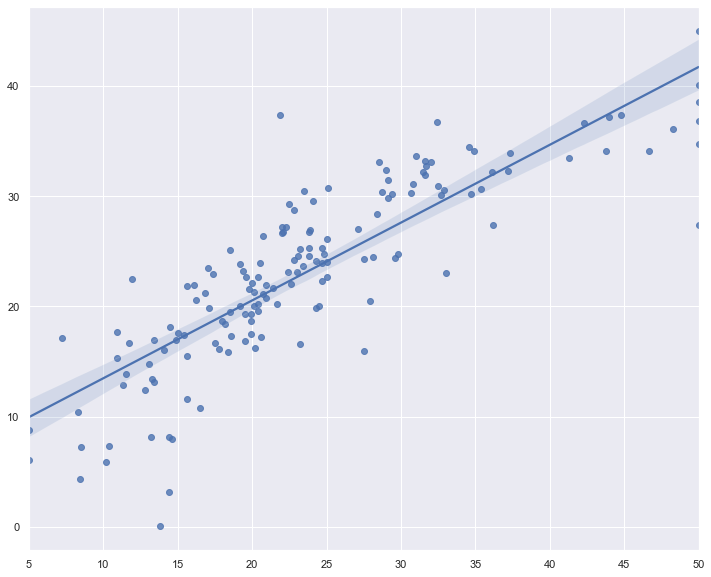

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
model = lin_model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print('\nScatter plot of y_test against y_pred:')
sns.regplot(y_test, y_pred);

C:\Users\Imad18\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

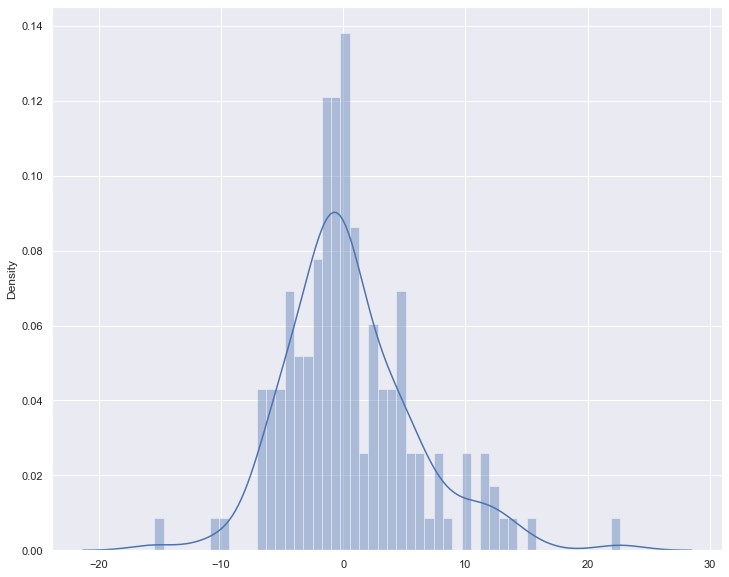

In [22]:
sns.distplot((y_test-predictions),bins=50)